In [1]:
import pandas as pd
import numpy as np

Upload The Dataset

In [2]:
data1 = pd.read_csv('train.csv')
data1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
data2 = pd.read_csv('test.csv')
data2.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


##  Data Preprocessing

Check For the Null Values

In [5]:
print(f"Null Values In Training Dataset : \n{data1.isna().sum()}")

Null Values In Training Dataset : 
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [6]:
print(data1['Age'].mean())
print(data1['Age'].median())

29.69911764705882
28.0


Filling the null values of the Training data

In [7]:
data1['Age'].fillna(data1['Age'].median(),inplace=True)

In [8]:
data1['Cabin'].value_counts().index[0]

'B96 B98'

In [9]:
data1['Cabin'].fillna(data1['Cabin'].value_counts().index[0],inplace= True)


In [10]:
data1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,B96 B98,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,B96 B98,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,B96 B98,S


In [11]:
data1.dropna(inplace=True)

In [12]:
print(f"Null Values In Training Dataset : \n{data1.isna().sum()}")

Null Values In Training Dataset : 
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


In [13]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Cabin        889 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 90.3+ KB


Label Encoding the required Columns

In [14]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data1['Sex'] = le.fit_transform(data1['Sex'])
data1['Embarked'] = le.fit_transform(data1['Embarked'])


Checking for the Correlation in the data

<AxesSubplot:>

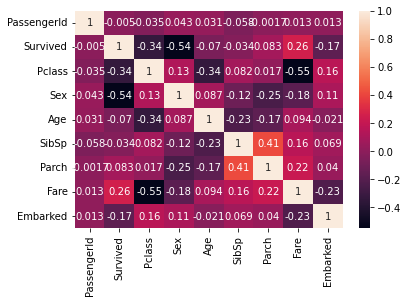

In [15]:
import seaborn as sns
sns.heatmap(data1.corr(),annot=True)

In [16]:
data1['Survived'].value_counts()

0    549
1    340
Name: Survived, dtype: int64

# Data Modelling

This is a Classification Model so we can use :

Logisitic Regression,Decision Tree,Naive Bayes Model, Support Vector Machine

We check training our dataset for all these algorithms

In [17]:
y = data1['Survived']

In [18]:
x = data1.iloc[:,[2,4,5,6,7,9,11]]

## Logisitic Regression

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [20]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.20,random_state=41)

In [21]:
logR = LogisticRegression()
logR.fit(x_train,y_train)
yhat = logR.predict(x_test)

In [22]:
yhat

array([0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1], dtype=int64)

In [23]:
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

In [24]:
print(f"Accuracy score is {accuracy_score(y_test,yhat)}")
print(f"F1 score is {f1_score(y_test,yhat)}")

Accuracy score is 0.7752808988764045
F1 score is 0.6923076923076924


In [25]:
cm = confusion_matrix(y_test,yhat)

In [26]:
cm

array([[93, 16],
       [24, 45]], dtype=int64)

Checking For the Accuracy and Standard Deviation using Cross Validation Score

In [27]:
from sklearn.model_selection import cross_val_score 
accuracies_dt = cross_val_score(estimator = logR, X = x_test, y = y_test, cv = 10) 
print("For Logistic Regression : ")
print(f"Mean of Accuracy Score Using cross validation is {accuracies_dt.mean():,.4f}")
print(f"Standard Deviation of Accuracy Score Using cross validation is {accuracies_dt.std():,.4f}")

For Logistic Regression : 
Mean of Accuracy Score Using cross validation is 0.7971
Standard Deviation of Accuracy Score Using cross validation is 0.1054


c:\Users\JAINAM\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\JAINAM\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

**We Get Accuracy of 0.7971 and standard deviation of 0.1054 for Logistic Regression Model**

## Decision Tree

In [28]:
from sklearn.tree import DecisionTreeClassifier

In [29]:
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
yhat1 = dt.predict(x_test)

In [30]:
yhat1

array([0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 1], dtype=int64)

In [31]:
print(f"Accuracy score is {accuracy_score(y_test,yhat1)}")

Accuracy score is 0.7921348314606742


Checking For the Accuracy and Standard Deviation using Cross Validation Score

In [32]:
from sklearn.model_selection import cross_val_score 
accuracies_dt = cross_val_score(estimator = dt, X = x_test, y = y_test, cv = 10) 
print("For Decision Tree : ")
print(f"Mean of Accuracy Score Using cross validation is {accuracies_dt.mean():,.4f}")
print(f"Standard Deviation of Accuracy Score Using cross validation is {accuracies_dt.std():,.4f}")

For Decision Tree : 
Mean of Accuracy Score Using cross validation is 0.7418
Standard Deviation of Accuracy Score Using cross validation is 0.0656


**We Get Accuracy of 0.730 and standard deviation of 0.056 for Decision Tree Model**

## Naive Bayes

In [33]:
from sklearn.naive_bayes import GaussianNB
bayes = GaussianNB()
bayes.fit(x_train,y_train)
yhat2 = bayes.predict(x_test)

In [34]:
print(f"Accuracy score is {accuracy_score(y_test,yhat2)}")
print(f"F1 score is {f1_score(y_test,yhat2)}")

Accuracy score is 0.7528089887640449
F1 score is 0.6944444444444444


In [35]:
from sklearn.model_selection import cross_val_score 
accuracies_nb = cross_val_score(estimator = bayes, X = x_test, y = y_test, cv = 10) 
print("For Naive Bayes : ")
print(f"Mean of Accuracy Score Using cross validation is {accuracies_nb.mean()}")
print(f"Standard Deviation of Accuracy Score Using cross validation is {accuracies_nb.std()}")

For Naive Bayes : 
Mean of Accuracy Score Using cross validation is 0.7303921568627451
Standard Deviation of Accuracy Score Using cross validation is 0.1337256339485168


**We Get Accuracy of 0.7303 and standard deviation of 0.133 for Naive Bayes Model**

## SVM

In [36]:
from sklearn.preprocessing import StandardScaler 
sc = StandardScaler() 
X_train = sc.fit_transform(x_train) 
X_test = sc.transform(x_test)

In [37]:
from sklearn.svm import SVC 
svm = SVC(kernel = 'rbf', random_state = 0) 
svm.fit(X_train, y_train) 
y_pred = svm.predict(X_test)

In [38]:
from sklearn.metrics import confusion_matrix 
cm = confusion_matrix(y_test, y_pred)

In [39]:
from sklearn.model_selection import cross_val_score 
accuracies_svm = cross_val_score(estimator = svm, X = X_test, y = y_test, cv = 10) 
print("For SVM: ")
print(f"Mean of Accuracy Score on Test Data Using cross validation is {accuracies_svm.mean()}")
print(f"Standard Deviation of Accuracy Score on Test Data Using cross validation is {accuracies_svm.std()}")

For SVM: 
Mean of Accuracy Score on Test Data Using cross validation is 0.7751633986928105
Standard Deviation of Accuracy Score on Test Data Using cross validation is 0.09014870405002177


**We Get Accuracy of 0.7751 and standard deviation of 0.0901 for Support Vector Machine**

## Random Forest Classifier 

In [41]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
from sklearn.model_selection import cross_val_score 
accuracies_rf = cross_val_score(estimator = rf, X = X_test, y = y_test, cv = 10) 
print("For Random Forest Classifier: ")
print(f"Mean of Accuracy Score on Test Data Using cross validation is {accuracies_rf.mean()}")
print(f"Standard Deviation of Accuracy Score on Test Data Using cross validation is {accuracies_rf.std()}")

For Random Forest Classifier: 
Mean of Accuracy Score on Test Data Using cross validation is 0.7751633986928105
Standard Deviation of Accuracy Score on Test Data Using cross validation is 0.0616911759296046


**We Get Accuracy of 0.7751 and standard deviation of 0.0616 for Random Forest Classifier**

# **Summary**

**For Logistic Regression :**
**Accuracy is 0.7971 and standard deviation is 0.1054**


**For Decision Tree :**
**Accuracy is 0.7300 and standard deviation is 0.056**

**For Naive Bayes :**
**Accuracy is 0.7303 and standard deviation is 0.1333**

**For SVM :**
**Accuracy is 0.7751 and standard deviation is 0.0901**

**For Random Forest Classifier :**
**Accuracy is 0.7751 and standard deviation is 0.0616**

**We select Logistic Regression for our dataset as it has less Standard Deviation and also shows some good Accuracy**

In [43]:
data2.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",1,34.5,0,0,330911,7.8292,B57 B59 B63 B66,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,363272,7.0000,B57 B59 B63 B66,2
2,894,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,9.6875,B57 B59 B63 B66,1
3,895,3,"Wirz, Mr. Albert",1,27.0,0,0,315154,8.6625,B57 B59 B63 B66,2
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,3101298,12.2875,B57 B59 B63 B66,2


In [46]:
data2.isna().sum()

PassengerId     0
Pclass          0
Name            0
Sex             0
Age            86
SibSp           0
Parch           0
Ticket          0
Fare            1
Cabin           0
Embarked        0
dtype: int64

In [48]:
data2['Age'].fillna(data2['Age'].median(),inplace=True)
data2['Cabin'].fillna(data2['Cabin'].value_counts().index[0],inplace= True)

In [52]:
data2.dropna(inplace=True)

In [ ]:
data2['Sex'] = le.fit_transform(data2['Sex'])
data2['Embarked'] = le.fit_transform(data2['Embarked'])

In [53]:
X = data2.iloc[:,[1,3,4,5,6,8,10]]
X

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,34.5,0,0,7.8292,1
1,3,0,47.0,1,0,7.0000,2
2,2,1,62.0,0,0,9.6875,1
3,3,1,27.0,0,0,8.6625,2
4,3,0,22.0,1,1,12.2875,2
...,...,...,...,...,...,...,...
413,3,1,27.0,0,0,8.0500,2
414,1,0,39.0,0,0,108.9000,0
415,3,1,38.5,0,0,7.2500,2
416,3,1,27.0,0,0,8.0500,2


In [56]:
yhat_Test = logR.predict(X)
yhat_Test

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,

In [57]:
import numpy as np
import pandas as pd
predict = pd.DataFrame(yhat_Test, columns=['Survived']).to_csv('Survived_Test.csv')